<a href="https://colab.research.google.com/github/BIDS-CPU/data-science1/blob/main/DC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


In [14]:
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('nobel.csv')

In [6]:
df.sample(2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
481,1977,Physics,The Nobel Prize in Physics 1977,"""for their fundamental theoretical investigati...",1/3,108,Individual,Sir Nevill Francis Mott,1905-09-30,Leeds,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,1996-08-08,Milton Keynes,United Kingdom
65,1911,Peace,The Nobel Peace Prize 1911,NaN,1/2,478,Individual,Tobias Michael Carel Asser,1838-04-28,Amsterdam,Netherlands,Male,NaN,NaN,NaN,1913-07-29,the Hague,Netherlands


In [7]:
df.shape

(911, 18)

In [13]:
df.isnull().sum()/df.shape[0]

year                    0.000000
category                0.000000
prize                   0.000000
motivation              0.096597
prize_share             0.000000
laureate_id             0.000000
laureate_type           0.000000
full_name               0.000000
birth_date              0.030735
birth_city              0.030735
birth_country           0.028540
sex                     0.028540
organization_name       0.270033
organization_city       0.267838
organization_country    0.267838
death_date              0.349067
death_city              0.367728
death_country           0.361142
dtype: float64

In [10]:
df.duplicated().sum()

0

In [15]:
df.columns.to_list()

['year',
 'category',
 'prize',
 'motivation',
 'prize_share',
 'laureate_id',
 'laureate_type',
 'full_name',
 'birth_date',
 'birth_city',
 'birth_country',
 'sex',
 'organization_name',
 'organization_city',
 'organization_country',
 'death_date',
 'death_city',
 'death_country']

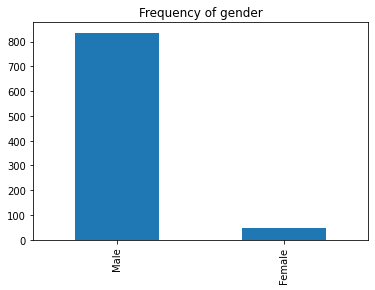

In [18]:
df.sex.value_counts().plot(kind='bar',title='Frequency of gender')

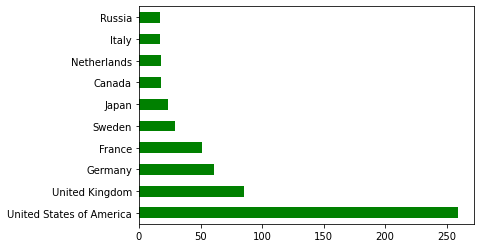

In [21]:
df.birth_country.value_counts().head(10).plot(kind='barh',color='green')

In [28]:
df['usa']=df['birth_country']=='United States of America'

In [40]:
df['decade']=df['year']-(df['year']%10)   

In [41]:
df.decade.value_counts()

2000    123
1970    104
1990    104
1980     97
2010     82
1960     79
1950     72
1900     57
1930     56
1920     54
1940     43
1910     40
Name: decade, dtype: int64

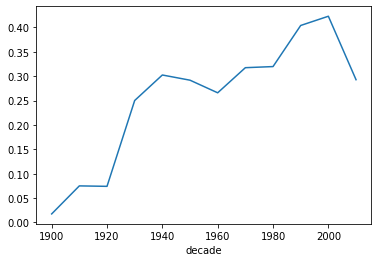

In [44]:
df.groupby('decade')['usa'].mean().plot()

In [46]:
df.sex.value_counts()

Male      836
Female     49
Name: sex, dtype: int64

In [52]:
df[df['sex']=='Female'].groupby(['decade','category']).mean()

year  laureate_id       usa
decade category                                      
1900   Literature  1909.000000   579.000000  0.000000
       Peace       1905.000000   468.000000  0.000000
       Physics     1903.000000     6.000000  0.000000
1910   Chemistry   1911.000000     6.000000  0.000000
1920   Literature  1927.000000   599.000000  0.000000
1930   Chemistry   1935.000000   194.000000  0.000000
       Literature  1938.000000   610.000000  1.000000
       Peace       1931.000000   496.000000  1.000000
1940   Literature  1945.000000   615.000000  0.000000
       Medicine    1947.000000   344.000000  0.000000
       Peace       1946.000000   506.000000  1.000000
1960   Chemistry   1964.000000   230.000000  0.000000
       Literature  1966.000000   640.000000  0.000000
       Physics     1963.000000    79.000000  0.000000
1970   Medicine    1977.000000   413.000000  1.000000
       Peace       1977.000000   537.000000  0.000000
1980   Medicine    1985.666667   433.666667  0.666667
       Peace       1982.000000   543.000000  0.000000
1990   Literature  1993.333333   670.333333  0.333333
       Medicine    1995.000000   453.000000  0.000000
       Peace       1993.333333   557.333333  0.333333
2000   Chemistry   2009.000000   843.000000  0.000000
       Economics   2009.000000   846.000000  1.000000
       Literature  2006.666667   814.333333  0.000000
       Medicine    2007.500000   817.500000  0.500000
       Peace       2003.500000   778.000000  0.000000
2010   Literature  2014.000000   908.000000  0.000000
       Medicine    2014.500000   911.000000  0.000000
       Peace       2011.750000   881.000000  0.000000

In [54]:
df[df['sex']=='Female'].nsmallest(1,'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900


In [59]:
df.groupby('full_name').filter(lambda x:len(x)>1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960


In [70]:
df['by']=pd.to_datetime(df['birth_date']).dt.year

In [71]:
df['Ny']=df['year']-df['by']

In [72]:
df.Ny

0      49.0
1      62.0
2      47.0
3      73.0
4      79.0
       ... 
906    71.0
907    65.0
908    82.0
909    65.0
910    73.0
Name: Ny, Length: 911, dtype: float64

In [73]:
import seaborn as sea

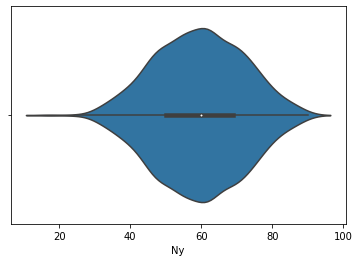

In [80]:
sea.violinplot(df['Ny'])

In [89]:
df.groupby('category')['Ny'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Chemistry,174.0,58.040230,11.457062,35.0,50.00,57.0,67.0,85.0
Economics,78.0,67.076923,8.091633,51.0,61.25,67.0,72.5,90.0
Literature,113.0,64.672566,10.247336,42.0,57.00,67.0,73.0,88.0
Medicine,211.0,57.971564,11.682268,32.0,49.00,57.0,65.0,87.0
Peace,104.0,61.394231,12.982003,17.0,54.00,62.0,71.0,87.0
Physics,203.0,55.374384,13.693886,25.0,45.00,54.0,64.0,88.0


In [93]:
df.nlargest(5,'Ny')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa,decade,by,Ny
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,1917.0,90.0
856,2012,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the theory of stable allocations and the ...",1/2,883,Individual,Lloyd S. Shapley,1923-06-02,"Cambridge, MA",...,University of California,"Los Angeles, CA",United States of America,2016-03-12,"Tucson, AZ",United States of America,True,2010,1923.0,89.0
744,2002,Physics,The Nobel Prize in Physics 2002,"""for pioneering contributions to astrophysics,...",1/4,753,Individual,Raymond Davis Jr.,1914-10-14,"Washington, DC",...,University of Pennsylvania,"Philadelphia, PA",United States of America,2006-05-31,"Blue Point, NY",United States of America,True,2000,1914.0,88.0
796,2007,Literature,The Nobel Prize in Literature 2007,"""that epicist of the female experience, who wi...",1/1,817,Individual,Doris Lessing,1919-10-22,Kermanshah,...,NaN,NaN,NaN,2013-11-17,London,United Kingdom,False,2000,1919.0,88.0
373,1966,Medicine,The Nobel Prize in Physiology or Medicine 1966,"""for his discovery of tumour-inducing viruses""",1/2,383,Individual,Peyton Rous,1879-10-05,"Baltimore, MD",...,Rockefeller University,"New York, NY",United States of America,1972-02-16,"New York, NY",United States of America,True,1960,1879.0,87.0


In [94]:
df.nsmallest(5,'Ny')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa,decade,by,Ny
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,1997.0,17.0
85,1915,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,21,Individual,William Lawrence Bragg,1890-03-31,Adelaide,...,Victoria University,Manchester,United Kingdom,1971-07-01,Ipswich,United Kingdom,False,1910,1890.0,25.0
166,1932,Physics,The Nobel Prize in Physics 1932,"""for the creation of quantum mechanics, the ap...",1/1,38,Individual,Werner Karl Heisenberg,1901-12-05,Würzburg,...,Leipzig University,Leipzig,Germany,1976-02-01,Munich,West Germany (Germany),False,1930,1901.0,31.0
171,1933,Physics,The Nobel Prize in Physics 1933,"""for the discovery of new productive forms of ...",1/2,40,Individual,Paul Adrien Maurice Dirac,1902-08-08,Bristol,...,University of Cambridge,Cambridge,United Kingdom,1984-10-20,"Tallahassee, FL",United States of America,False,1930,1902.0,31.0
189,1936,Physics,The Nobel Prize in Physics 1936,"""for his discovery of the positron""",1/2,43,Individual,Carl David Anderson,1905-09-03,"New York, NY",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1991-01-11,"San Marino, CA",United States of America,True,1930,1905.0,31.0
